In [ ]:
https://machinelearningmastery.com/develop-character-based-neural-language-model-keras/

In [ ]:
s = "Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose."

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from pickle import dump
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# save tokens to file, one dialog per line
def save_doc(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
# load text
raw_text = s#load_doc('rhyme.txt')
print(raw_text)
# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
  # select sequence of tokens
  seq = raw_text[i-length:i+1]
  # store
  sequences.append(seq)
print('Total Sequences: %d' % len(sequences))
# save sequences to file
out_filename = 'char_sequences.txt'
save_doc(sequences, out_filename)

Sing a song of sixpence, A pocket full of rye. Four and twenty blackbirds, Baked in a pie. When the pie was opened The birds began to sing; Wasn't that a dainty dish, To set before the king. The king was in his counting house, Counting out his money; The queen was in the parlour, Eating bread and honey. The maid was in the garden, Hanging out the clothes, When down came a blackbird And pecked off her nose.
Total Sequences: 399


In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

The sequences of characters must be encoded as integers. This means that each unique character
will be assigned a speci
c integer value and each sequence of characters will be encoded as a
sequence of integers. We can create the mapping given a sorted set of unique characters in the
raw input data. The mapping is a dictionary of character values to integer values.

In [ ]:

chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

In [ ]:
sequences = list()
for line in lines:
	# integer encode line
	encoded_seq = [mapping[char] for char in line]
	# store
	sequences.append(encoded_seq)

In [ ]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


Create dataset:

In [ ]:
import numpy as np

sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

In [ ]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                34200     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2888      
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________
None


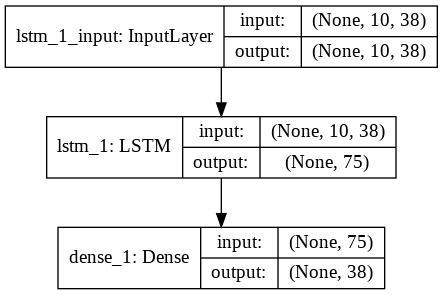

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, epochs=100, verbose=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





 - 1s - loss: 3.6137 - acc: 0.0752
Epoch 2/100
 - 0s - loss: 3.5069 - acc: 0.1905
Epoch 3/100
 - 0s - loss: 3.1959 - acc: 0.1905
Epoch 4/100
 - 0s - loss: 3.0527 - acc: 0.1905
Epoch 5/100
 - 0s - loss: 3.0180 - acc: 0.1905
Epoch 6/100
 - 0s - loss: 2.9929 - acc: 0.1905
Epoch 7/100
 - 0s - loss: 2.9723 - acc: 0.1905
Epoch 8/100
 - 0s - loss: 2.9573 - acc: 0.1905
Epoch 9/100
 - 0s - loss: 2.9391 - acc: 0.1905
Epoch 10/100
 - 0s - loss: 2.9226 - acc: 0.1905
Epoch 11/100
 - 0s - loss: 2.9036 - acc: 0.1930
Epoch 12/100
 - 0s - loss: 2.8716 - acc: 0.2055
Epoch 13/100
 - 0s - loss: 2.8589 - acc: 0.2155
Epoch 14/100
 - 0s - loss: 2.8374 - acc: 0.2055
Epoch 15/100
 - 0s - loss: 2.8116 - acc: 0.2155
Epoch 16/100
 - 0s - loss: 2.7770 - acc: 0.2080
Epoch 17/100
 - 0s - loss: 2.7459 - acc: 0.2256
Epoch 18/100
 - 0s - loss: 2.7167 - acc: 0.2456
Epoch 19/100
 - 0s - loss: 2.6998 - acc: 

In [ ]:
# save the model to file
model.save('model.h5')

In [ ]:
# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

# Generate Text

We must provide sequences of 10 characters as input to the model in order to start the generation process. We will pick these manually.

A given input sequence will need to be prepared in the same way as preparing the training data for the model.

First, the sequence of characters must be integer encoded using the loaded mapping.
```
# encode the characters as integers
encoded = [mapping[char] for char in in_text]


```
Next, the sequences need to be one hot encoded using the to_categorical() Keras function.
```
# one hot encode
encoded = to_categorical(encoded, num_classes=len(mapping))

```
We can then use the model to predict the next character in the sequence.

We use predict_classes() instead of predict() to directly select the integer for the character with the highest probability instead of getting the full probability distribution across the entire set of characters.
```
# predict character
yhat = model.predict_classes(encoded, verbose=0)


```
We can then decode this integer by looking up the mapping to see the character to which it maps.
```
out_char = ''
for char, index in mapping.items():
	if index == yhat:
		out_char = char
		break


```    
This character can then be added to the input sequence. We then need to make sure that the input sequence is 10 characters by truncating the first character from the input sequence text.

We can use the pad_sequences() function from the Keras API that can perform this truncation operation.

Putting all of this together, we can define a new function named generate_seq() for using the loaded model to generate new sequences of text.
```
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
	in_text = seed_text
	# generate a fixed number of characters
	for _ in range(n_chars):
		# encode the characters as integers
		encoded = [mapping[char] for char in in_text]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# one hot encode
		encoded = to_categorical(encoded, num_classes=len(mapping))
		# predict character
		yhat = model.predict_classes(encoded, verbose=0)
		# reverse map integer to character
		out_char = ''
		for char, index in mapping.items():
			if index == yhat:
				out_char = char
				break
		# append to input
		in_text += char
	return in_text
```

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
   in_text = seed_text
   # generate a fixed number of characters
   for _ in range(n_chars):
      # encode the characters as integers
      encoded = [mapping[char] for char in in_text]
      # truncate sequences to a fixed length
      encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
      #print(encoded.shape)
      # one hot encode
      encoded = to_categorical(encoded, num_classes=len(mapping))
      #print(encoded.shape)
      #encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])
      # predict character
      yhat = model.predict_classes(encoded, verbose=0)
      # reverse map integer to character
      out_char = ''
      for char, index in mapping.items():
         if index == yhat:
            out_char = char
            break
      # append to input
      in_text += char
   return in_text

# load the model
model = load_model('model.h5')
# load the mapping
mapping = load(open('mapping.pkl', 'rb'))

# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'king was i', 20))
# test not in original
print(generate_seq(model, mapping, 10, 'hello worl', 20))

Sing a song of sixpence, A poc
king was in his counting house
hello worle Ff rinr tadaad ann


The first is a test to see how the model does at starting from the beginning of the rhyme.

The second is a test to see how well it does at beginning in the middle of a line. The final example is a test to see how well it does with a sequence of characters never seen before.

We can see that the model did very well with the first two examples, as we would expect. We can also see that the model still generated something for the new text, but it is nonsense.